In [1]:
def norm_data(df, norm_type):
    if norm_type == "Z-score":
        # Z-score
        from sklearn import preprocessing
        normalizer=preprocessing.scale(df[select_feature])
        normed_data=pd.DataFrame(normalizer)
        tmp_df = df[fix_feature]
        tmp_df.reset_index(drop=True, inplace=True)
        df_norm = pd.concat([tmp_df,normed_data],axis=1,ignore_index=True)
        df_norm.columns = df.columns
    if norm_type == "MaxMin":
        # 最大最小值标化
        from sklearn import preprocessing
        min_max_normalizer=preprocessing.MinMaxScaler(feature_range=(-1,1))
        scaled_data=min_max_normalizer.fit_transform(df[select_feature])
        scaled_data = pd.DataFrame(scaled_data)
        tmp_df = df[fix_feature]
        tmp_df.reset_index(drop=True, inplace=True)
        df_norm = pd.concat([tmp_df,scaled_data],axis=1,ignore_index=True)
        df_norm.columns = df.columns
    return df_norm


In [2]:
import pandas as pd

In [3]:
select_feature = ['cns_sofa','respiration_sofa','coagulation_sofa', 'liver_sofa', 'cardiovascular_sofa', 'renal_sofa', 'sofa']
fix_feature = ["dataset","groupHPD","time"]
select_features = fix_feature + select_feature

df = pd.read_csv("./df_sofa_merge.csv")

# 时间选择
time_lst = [-2,-1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16] #,17,18,19,20,21,22,23,24,25,26,27,28]
df = df[df["time"].isin(time_lst)]

df_grouped = df.groupby(["dataset","groupHPD","time"]).agg('mean').reset_index()
df_grouped = df_grouped[select_features]

dataset_dict = {"aumcdb":2, "mimic":1,"eicu":3}
df_grouped["dataset"] = df_grouped["dataset"].map(dataset_dict)
df_grouped = df_grouped.sort_values(["groupHPD","dataset","time"])
print(df_grouped.dataset.unique())
df_grouped.head(2)

[1 2 3]


,dataset,groupHPD,time,cns_sofa,respiration_sofa,coagulation_sofa,liver_sofa,cardiovascular_sofa,renal_sofa,sofa
108,1,1.0,-2,0.628659,1.240370,0.768875,0.446071,1.620185,0.325886,5.030046
109,1,1.0,-1,0.733436,1.483821,0.849769,0.503852,1.838983,0.449153,5.859014


In [4]:
norm_type = "MaxMin"
norm_bydataset = True
if norm_bydataset == True: 
    tmp_df = df_grouped[df_grouped["dataset"] == 1]
    df_norm = norm_data(tmp_df, norm_type)
    df_norm_merge =  df_norm

    tmp_df = df_grouped[df_grouped["dataset"] == 2]
    df_norm = norm_data(tmp_df, norm_type)
    df_norm_merge = pd.concat([df_norm_merge, df_norm], axis=0,ignore_index=True)

    tmp_df = df_grouped[df_grouped["dataset"] == 3]
    df_norm = norm_data(tmp_df, norm_type)
    df_norm_merge = pd.concat([df_norm_merge, df_norm], axis=0,ignore_index=True)
if norm_bydataset == False:
    df_norm = norm_data(df_grouped, norm_type)
    df_norm_merge =  df_norm
    
df_grouped = df_norm_merge

In [5]:
df1 = df_grouped[df_grouped["groupHPD"]==1]
df2 = df_grouped[df_grouped["groupHPD"]==2]
df3 = df_grouped[df_grouped["groupHPD"]==3]
df1 = df1.pivot(index="dataset",columns="time",values=select_feature).reset_index()
df2 = df2.pivot(index="dataset",columns="time",values=select_feature).reset_index()
df3 = df3.pivot(index="dataset",columns="time",values=select_feature).reset_index()

tmp_df = pd.DataFrame()
for fea in select_feature:
    tmp_df = pd.concat([tmp_df,df1[fea]],axis=0)
df1 = tmp_df.values

tmp_df = pd.DataFrame()
for fea in select_feature:
    tmp_df = pd.concat([tmp_df,df2[fea]],axis=0)
df2 = tmp_df.values

tmp_df = pd.DataFrame()
for fea in select_feature:
    tmp_df = pd.concat([tmp_df,df3[fea]],axis=0)
df3 = tmp_df.values

<ipython-input-6-6c33cf143dc6>:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


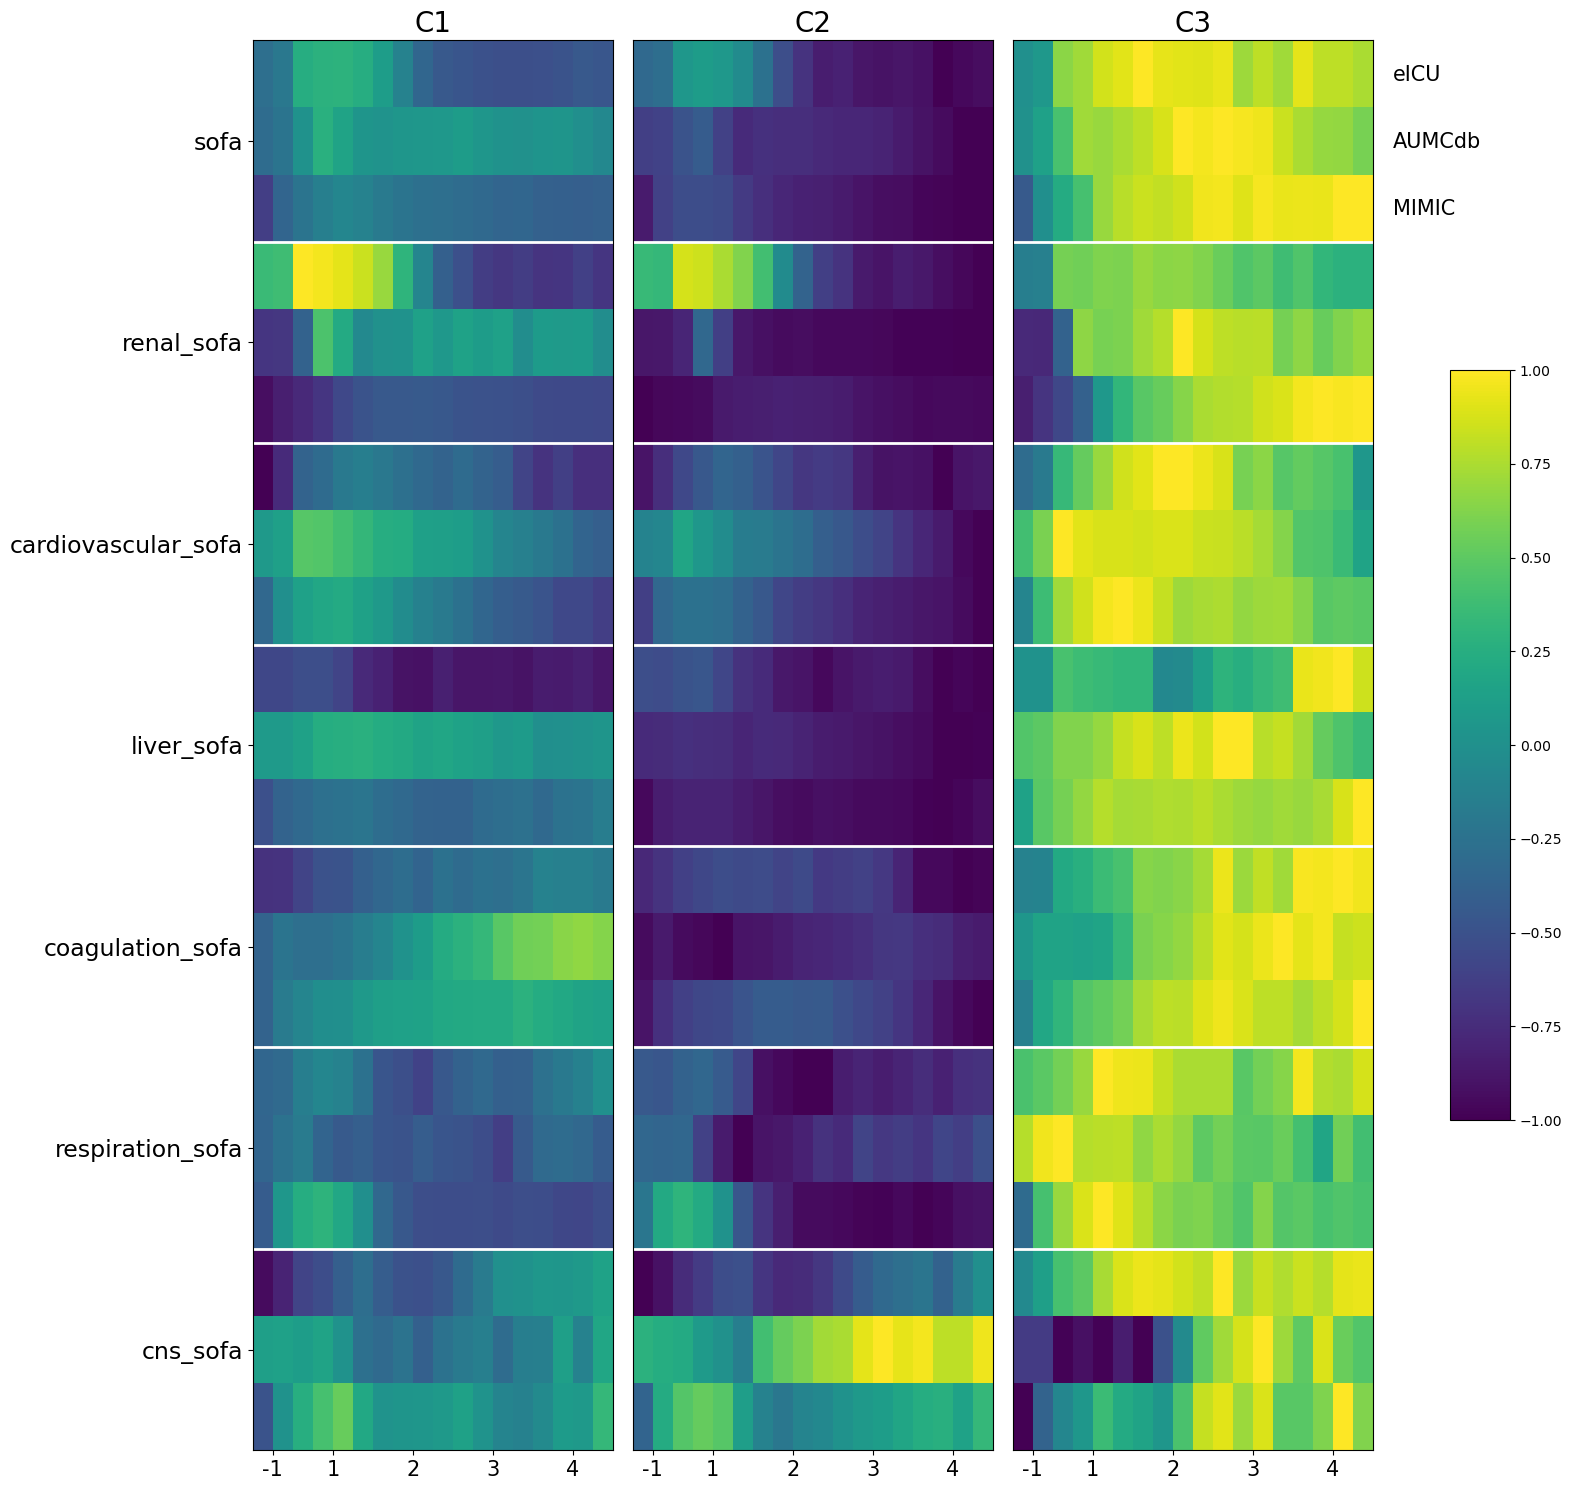

In [6]:
import matplotlib.pyplot as plt
data = ["df1", "df2", "df3"]
data_len = df1.shape[1]
fig, (ax0, ax1, ax2) = plt.subplots(1, 3,figsize=(15, 15))

c = ax0.pcolormesh(eval(data[0]))
ax0.set_title('C1',fontsize=20)
ax0.set_xticks([1,4,8,12,16], [-1,1, 2,3,4],fontsize=15)
#ax0.set_xticks([1,4,8,12,16,20,24,28], [-1,1, 2,3,4,5,6,7],fontsize=15)
ax0.set_yticks([i+0.5 for i in range(1, len(select_feature)*3,3)], select_feature,fontsize=17)

c = ax1.pcolormesh(eval(data[1]))
ax1.set_title('C2',fontsize=20)
ax1.set_yticks([])
#ax1.set_xticks([1,4,8,12,16,20,24,28], [-1,1, 2,3,4,5,6,7],fontsize=15)
ax1.set_xticks([1,4,8,12,16], [-1,1, 2,3,4],fontsize=15)

c = ax2.pcolormesh(eval(data[2]))
ax2.set_title('C3',fontsize=20)
ax2.set_yticks([])
#ax2.set_xticks([1,4,8,12,16,20,24,28], [-1,1, 2,3,4,5,6,7],fontsize=15) 
ax2.set_xticks([1,4,8,12,16], [-1,1, 2,3,4],fontsize=15)

def _annotate(ax,y_lst):
    for y in y_lst:
        ax.axhline(y=y,ls="-",c="w", linewidth=2)
_annotate(ax0, [i *3 for i in range(1,len(select_feature))])
_annotate(ax1, [i *3 for i in range(1,len(select_feature))])
_annotate(ax2, [i *3 for i in range(1,len(select_feature))])

plt.text(time_lst[-1]+3,len(select_feature)*3-0.6,"eICU",fontsize=15)
plt.text(time_lst[-1]+3,len(select_feature)*3-1.6,"AUMCdb",fontsize=15)
plt.text(time_lst[-1]+3,len(select_feature)*3-2.6,"MIMIC",fontsize=15)
position=fig.add_axes([0.97,0.25,0.04,0.5])
fig.colorbar(c,ax=ax2,cax=position)
fig.tight_layout()
plt.show()

In [7]:
stop!

SyntaxError: invalid syntax (<ipython-input-7-8c726f94684c>, line 1)